# Visualization of the data

In [1]:
# Data Handling
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/processed/creditcard_cleaned.csv')

In [3]:
data.head().T

,0,1,2,3,4
V1,-0.260648,0.985100,-0.260272,-0.152152,-0.206820
V2,-0.469648,-0.356045,-0.949385,-0.508959,-0.165280
V3,2.496266,0.558056,1.728538,1.746840,1.527053
V4,-0.083724,-0.429654,-0.457986,-1.090178,-0.448293
V5,0.129681,0.277140,0.074062,0.249486,0.106125
V6,0.732898,0.428605,1.419481,1.143312,0.530549
V7,0.519014,0.406466,0.743511,0.518269,0.658849
V8,-0.130006,-0.133118,-0.095576,-0.065130,-0.212660
V9,0.727159,0.347452,-0.261297,-0.205698,1.049921
V10,0.637735,0.529808,0.690708,0.575231,0.968046


In [4]:
# Look the distribution of the variable Class

data['Class'].value_counts()


Class
0    284315
1    284315
Name: count, dtype: int64

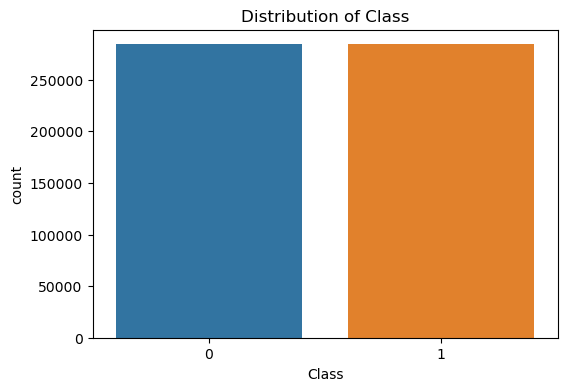

In [5]:
# Plot the distribution of the variable Class

fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Class')
plt.show()

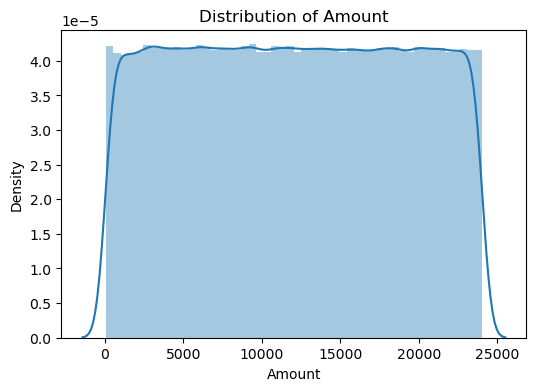

In [6]:
# Plot the distribution of the variable Amount

fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(data['Amount'])
plt.title('Distribution of Amount')
plt.show()

In [19]:
# Because the dataset have a lot of data (568630 rows), we analize if the distribution of the variables are normal with a Kolmogorov-Smirnov test

from scipy.stats import kstest

for col in data.columns:
    p_value = kstest(data[col], 'norm').pvalue
    result = 'Normal Distribution' if p_value > 0.05 else 'Not Normal Distribution'
    print(f' * {col}: p_value = {p_value} -> {result}')

 * V1: p_value = 0.0 -> Not Normal Distribution
 * V2: p_value = 0.0 -> Not Normal Distribution
 * V3: p_value = 0.0 -> Not Normal Distribution
 * V4: p_value = 0.0 -> Not Normal Distribution
 * V5: p_value = 0.0 -> Not Normal Distribution
 * V6: p_value = 0.0 -> Not Normal Distribution
 * V7: p_value = 0.0 -> Not Normal Distribution
 * V8: p_value = 0.0 -> Not Normal Distribution
 * V9: p_value = 0.0 -> Not Normal Distribution
 * V10: p_value = 0.0 -> Not Normal Distribution
 * V11: p_value = 2.528272111240796e-294 -> Not Normal Distribution
 * V12: p_value = 0.0 -> Not Normal Distribution
 * V13: p_value = 1.161657831332265e-42 -> Not Normal Distribution
 * V14: p_value = 0.0 -> Not Normal Distribution
 * V15: p_value = 6.527637690174873e-175 -> Not Normal Distribution
 * V16: p_value = 0.0 -> Not Normal Distribution
 * V17: p_value = 0.0 -> Not Normal Distribution
 * V18: p_value = 0.0 -> Not Normal Distribution
 * V19: p_value = 0.0 -> Not Normal Distribution
 * V20: p_value = 0.0 

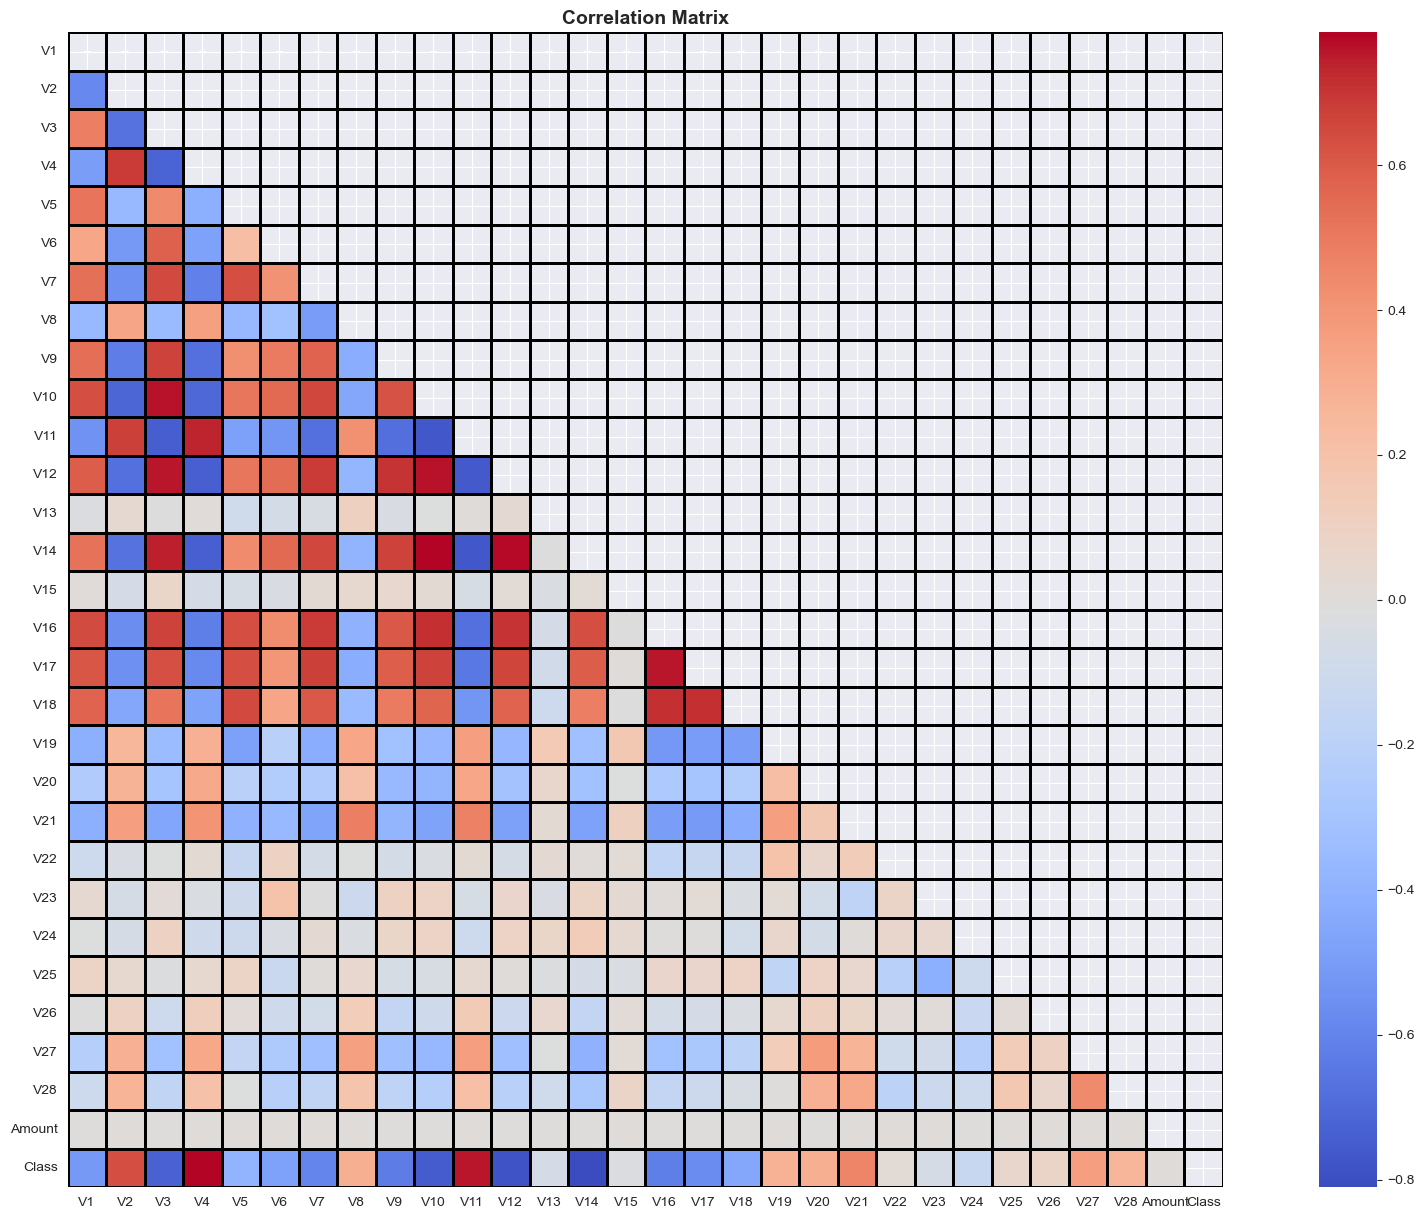

In [28]:
# The variables are not normal distributed, so we use a Spearman correlation.
# Now we plot the correlation matrix

sns.set_style('darkgrid')
corr = data.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
fig, ax = plt.subplots(figsize=(25,15))

sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', square=True, linewidths=1.0, linecolor="black", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.show()